<a href="https://colab.research.google.com/gist/ezzeldinadel/a4a4cd74309eb61ff6894c821cad2dc5/hsc24-ezz-tahoun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   alert_id  feature1  feature2  feature3  cluster
0         1         1         1       0.5        1
1         2         2         2       0.6        1
2         3         1         2       0.5        1
3         4         5         5       1.5        2
4         5         6         5       1.6        2
5         6         4         4       1.4        0
6         7         5         4       1.5        0
7         8         6         6       1.6        2
8         9         4         5       1.4        0
9        10         3         3       1.3        0


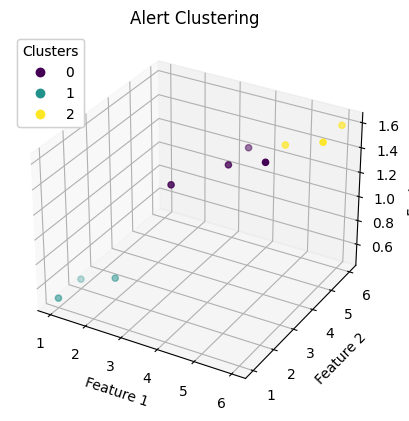

In [4]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data - replace with your alerts data
data = {
    'alert_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature1': [1, 2, 1, 5, 6, 4, 5, 6, 4, 3], #technique
    'feature2': [1, 2, 2, 5, 5, 4, 4, 6, 5, 3], # entities' attribute1 (bunit)
    'feature3': [0.5, 0.6, 0.5, 1.5, 1.6, 1.4, 1.5, 1.6, 1.4, 1.3] # time
}
df = pd.DataFrame(data)

# Features for clustering
features = df[['feature1', 'feature2', 'feature3']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


#kmeans
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(features_scaled)


# DBSCAN clustering
#dbscan = DBSCAN(eps=0.5, min_samples=2)
#df['cluster'] = dbscan.fit_predict(features_scaled)

# Print the resulting clusters
print(df)

# Plotting the clusters in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['feature1'], df['feature2'], df['feature3'], c=df['cluster'], cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Alert Clustering')
plt.show()
